In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('driver-data.csv')

In [4]:
df

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25
...,...,...,...
3995,3423310685,160.04,10
3996,3423312600,176.17,5
3997,3423312921,170.91,12
3998,3423313630,176.14,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [6]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [7]:
from sklearn.cluster import KMeans
MK_Model_1 = KMeans(n_clusters=2)

In [8]:
Data = df.drop(['id'],axis=1)

In [10]:
MK_Model_1.fit(Data)

KMeans(n_clusters=2)

In [11]:
MK_Model_1.cluster_centers_

array([[180.017075  ,  18.29      ],
       [ 50.04763438,   8.82875   ]])

In [14]:
KM_LAbles = pd.Series(data = MK_Model_1.labels_ , name = 'Lables')

In [13]:
len(MK_Model_1.labels_)

4000

In [16]:
KM_LAbles.value_counts()

1    3200
0     800
Name: Lables, dtype: int64

In [17]:
Uniq,Count = np.unique(MK_Model_1.labels_ , return_counts=True)

In [23]:
dic = dict(zip(Uniq,Count))

In [24]:
dic

{0: 800, 1: 3200}

In [25]:
Data['Lables'] = KM_LAbles

In [26]:
Data

,mean_dist_day,mean_over_speed_perc,Lables
0,71.24,28,1
1,52.53,25,1
2,64.54,27,1
3,55.69,22,1
4,54.58,25,1
...,...,...,...
3995,160.04,10,0
3996,176.17,5,0
3997,170.91,12,0
3998,176.14,5,0


In [28]:
sns.set_style('whitegrid')

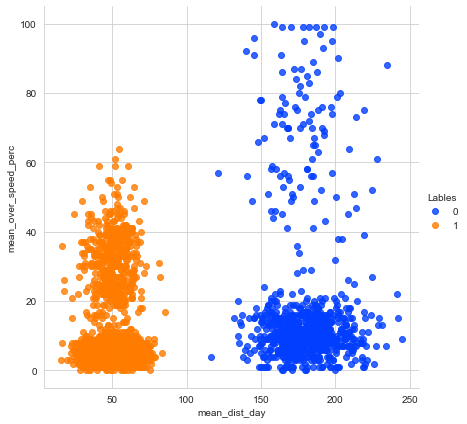

In [35]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=Data, hue='Lables',palette='bright', height=6, aspect=1,fit_reg=False )

In [36]:
MK_Model_2 = KMeans(n_clusters=4)

In [37]:
Data = df.drop(['id'],axis=1)

In [38]:
MK_Model_2.fit(Data)

KMeans(n_clusters=4)

In [39]:
MK_Model_2.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [41]:
KM_LAbles2 = pd.Series(data = MK_Model_2.labels_ , name = 'Lables')

In [42]:
KM_LAbles2.value_counts()

0    2773
1     696
3     427
2     104
Name: Lables, dtype: int64

In [43]:
Data['Lables'] = KM_LAbles2

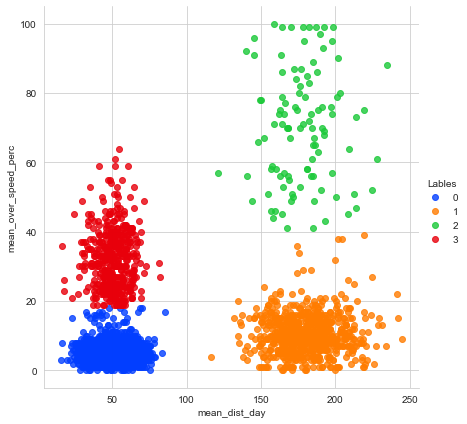

In [44]:
sns.lmplot(x='mean_dist_day',y='mean_over_speed_perc',data=Data, hue='Lables',palette='bright', height=6, aspect=1,fit_reg=False )